## Table of Contents

* [1. Introduction](#Introduction)
* [2. Gather the Data](#Gather_the_Data)
* [3. Prepare Data for Consumption](#Prepare_Data_for_Consumption)
* [4. Exploratory Data Analysis (EDA)](#Exploratory_Data_Analysis)
* [5. Feature Engineering](#Feature_Engineering)
* [6. Model Data](#Model_Data)

## 1. Introduction <a class="anchor" id="Introduction"></a>

RMS Titanic was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, UK, to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, which made the sinking one of the deadliest for a single ship up to that time.

In this competition we need build a predictive model that answers the question: “what sorts of people were more likely to survive?” 

## 2. Gather the Data <a class="anchor" id="Gather_the_Data"></a>

The dataset is provided by Kaggle. It could be downloaded [here](https://www.kaggle.com/competitions/titanic).

## 3. Prepare Data for Consumption <a class="anchor" id="Prepare_Data_for_Consumption"></a>

### 3.1 Import Libraries

The following work is written in Python 3.x.  
Importing necessary libraries:

In [77]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 3.2 Import Data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## 4. Exploratory Data Analysis (EDA) <a class="anchor" id="Exploratory_Data_Analysis"></a>

### 4.1 Understanding the Data

In [3]:
train_df.head()
# Checkig first rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.tail()
# Checkig last rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
test_df.head()
# Checkig first rows

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_df.tail()
# Checkig last rows

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
train_df.describe()
# Checking values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_df.describe()
# Checking values

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train_df.dtypes
# Checking values types

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Details about the features in the dataset:

- PassengerId - unique number of each passenger.
- Survived - information if the passenger survived or no (<b>0</b> - survived, <b>1</b> - not survived).
- Pclass - class of the passneger (<b>1</b>, <b>2</b> or <b>3</b>).
- Name - name of the passenger. 
- Sex - gender of the passenger (<b>male</b> or <b>female</b>). 
- Age - age of the passenger. 
- SibSp - the total number of the passengers' siblings and spouse. 
- Parch - the total number of the passengers' parents and children. 
- Ticket - the ticket number of the passenger.
- Fare - the passenger fare.
- Cabin - the cabin number of the passenger.
- Embarked - port of embarkation (<b>C</b>, <b>Q</b> or <b>S</b>). 

<b>Conclusion

- The dataset is infomration about each passenger on the Titanic with information about if the person survived the crash. 
- Train data set contains 12 columns and 891 rows
- Test data set contains 12 columns and 418 rows
- The survival rate in Train data set is <b>38%</b>

### 4.2 Check For Missing Data

In [10]:
train_df.info()
# Checking if there is missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
for col in train_df.columns.tolist():
    print (f'Amount of missing values in {col} - {train_df[col].isnull().sum()} ')
# Counting missing values

Amount of missing values in PassengerId - 0 
Amount of missing values in Survived - 0 
Amount of missing values in Pclass - 0 
Amount of missing values in Name - 0 
Amount of missing values in Sex - 0 
Amount of missing values in Age - 177 
Amount of missing values in SibSp - 0 
Amount of missing values in Parch - 0 
Amount of missing values in Ticket - 0 
Amount of missing values in Fare - 0 
Amount of missing values in Cabin - 687 
Amount of missing values in Embarked - 2 


Thera are a lot of missinga values in:
- Age - <b>177</b>
- Cabin - <b>687</b>
- Embarked - <b>2</b>

In [12]:
test_df.info()
# Checking if there is missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
for col in test_df.columns.tolist():
    print (f'Amount of missing values in {col} - {test_df[col].isnull().sum()} ')
# Counting missing values

Amount of missing values in PassengerId - 0 
Amount of missing values in Pclass - 0 
Amount of missing values in Name - 0 
Amount of missing values in Sex - 0 
Amount of missing values in Age - 86 
Amount of missing values in SibSp - 0 
Amount of missing values in Parch - 0 
Amount of missing values in Ticket - 0 
Amount of missing values in Fare - 1 
Amount of missing values in Cabin - 327 
Amount of missing values in Embarked - 0 


Thera are a lot of missinga values in:
- Age - <b>86</b>
- Cabin - <b>327</b>
- Fare - <b>1</b>

We will add missing data in age, embarked and fare:

In [14]:
train_df['Age'].fillna((train_df['Age'].mean()), inplace=True)

In [15]:
test_df['Age'].fillna((test_df['Age'].mean()), inplace=True)

In [16]:
test_df['Fare'].fillna((test_df['Fare'].mean()), inplace=True)

In [17]:
train_df['Embarked'].fillna((train_df['Embarked'].mode()[0]), inplace=True)

In [18]:
print('Train Set')
for col in train_df.columns.tolist():
    print (f'Amount of missing values in {col} - {train_df[col].isnull().sum()} ')
    
print('\n', '-'*50, '\n')

print('Test Set')
for col in test_df.columns.tolist():
    print (f'Amount of missing values in {col} - {test_df[col].isnull().sum()} ')
# Counting missing values again

Train Set
Amount of missing values in PassengerId - 0 
Amount of missing values in Survived - 0 
Amount of missing values in Pclass - 0 
Amount of missing values in Name - 0 
Amount of missing values in Sex - 0 
Amount of missing values in Age - 0 
Amount of missing values in SibSp - 0 
Amount of missing values in Parch - 0 
Amount of missing values in Ticket - 0 
Amount of missing values in Fare - 0 
Amount of missing values in Cabin - 687 
Amount of missing values in Embarked - 0 

 -------------------------------------------------- 

Test Set
Amount of missing values in PassengerId - 0 
Amount of missing values in Pclass - 0 
Amount of missing values in Name - 0 
Amount of missing values in Sex - 0 
Amount of missing values in Age - 0 
Amount of missing values in SibSp - 0 
Amount of missing values in Parch - 0 
Amount of missing values in Ticket - 0 
Amount of missing values in Fare - 0 
Amount of missing values in Cabin - 327 
Amount of missing values in Embarked - 0 


### 4.3 Basic Descriptions of Features

There are 3 cathegorical features, 1 ordinal, 2 continuous and 2 discrete features:
- Survived:
 - cathegorical feature
 - values <b>0</b> or <b>1</b> that represents if the passenger survived
- Pclass:
 - ordinal feature
 - values <b>1</b>, <b>2</b> or <b>3</b> that represents the class of the passenger
- Name:
 - cathegorical feature
 - unique name of each passenger
 - names have honorifics
- Sex:
 - cathegorical feature
 - values <b>male</b> or <b>female</b>
- SibSp:
 - discrete feature
 - values <b>0</b>-<b>8</b> that represents the total number of the passengers' siblings and spouse
- Parch:
 - discrete feature
 - values <b>0</b>-<b>6</b> that represents the total number of the passengers' parents and children
- Fare:
 - continuous feature
 - represents the price of the ticket
 - has <b>248</b> unique values from <b>0</b> till <b>512</b>
- Embarked:
 - cathegorical feature
 - values <b>C</b>, <b>Q</b> or <b>S</b> that represents the port of embarkation 

### 4.4 Identification of The Shape of the Data

[Text(0, 0, 'Not Survived'), Text(1, 0, 'Survived')]

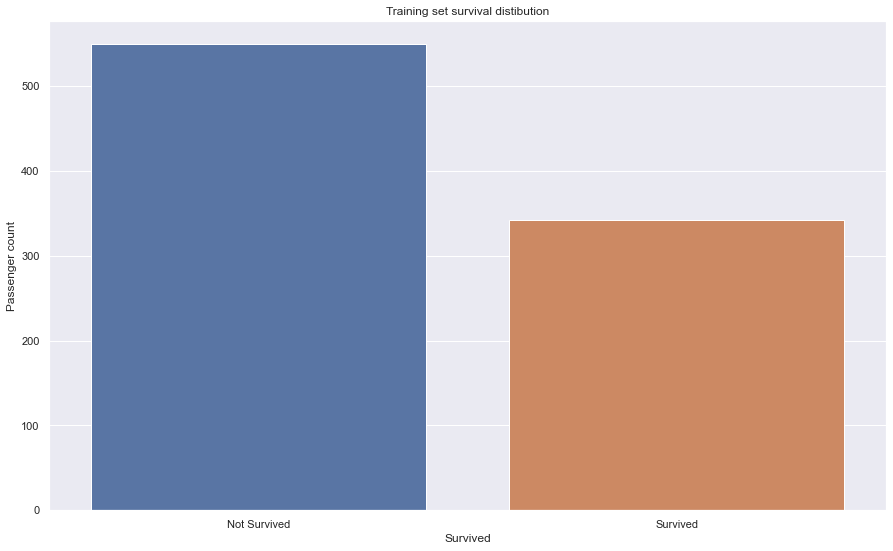

In [19]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(figsize=(15, 9))
my_xticks = ['Not Survived','Survived']
ax = sns.countplot(x="Survived", data=train_df)
ax.set(xlabel='Survived', ylabel='Passenger count', title="Training set survival distibution")
ax.set_xticklabels(my_xticks)

Most of the passengers didn`t susrvive

[Text(0, 0, 'First'), Text(1, 0, 'Second'), Text(2, 0, 'Third')]

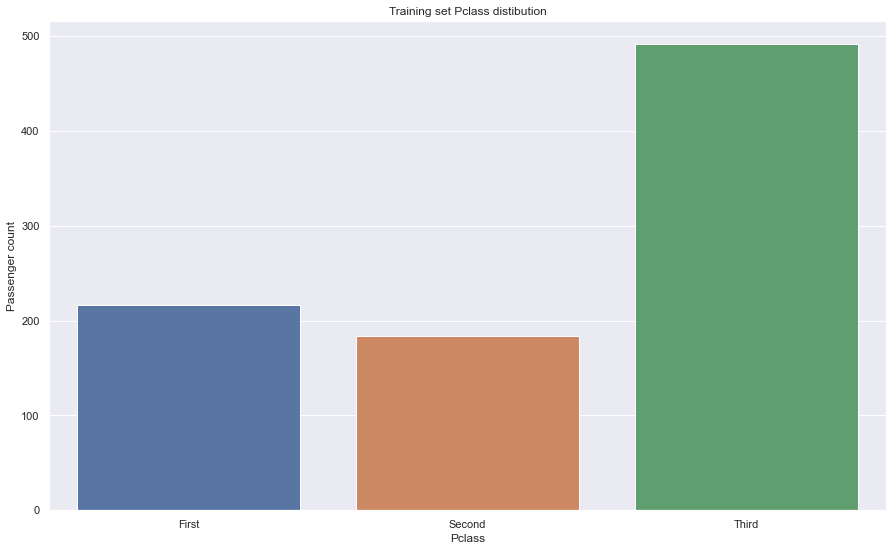

In [20]:
fig, axs = plt.subplots(figsize=(15, 9))
my_xticks = ['First','Second', 'Third']
ax = sns.countplot(x="Pclass", data=train_df)
ax.set(xlabel='Pclass', ylabel='Passenger count', title="Training set Pclass distibution")
ax.set_xticklabels(my_xticks)

Most of the people travelled in Third class

[Text(0.5, 0, 'Sex'),
 Text(0, 0.5, 'Passenger count'),
 Text(0.5, 1.0, 'Training set Sex distibution')]

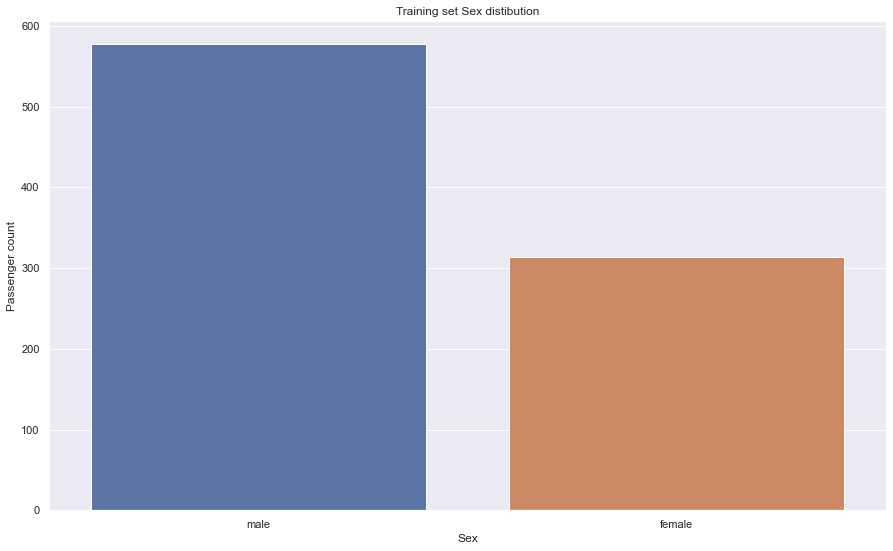

In [21]:
fig, axs = plt.subplots(figsize=(15, 9))
ax = sns.countplot(x="Sex", data=train_df)
ax.set(xlabel='Sex', ylabel='Passenger count', title="Training set Sex distibution")

Most of the passengers were male

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Passenger count'),
 Text(0.5, 1.0, 'Training set Age distibution')]

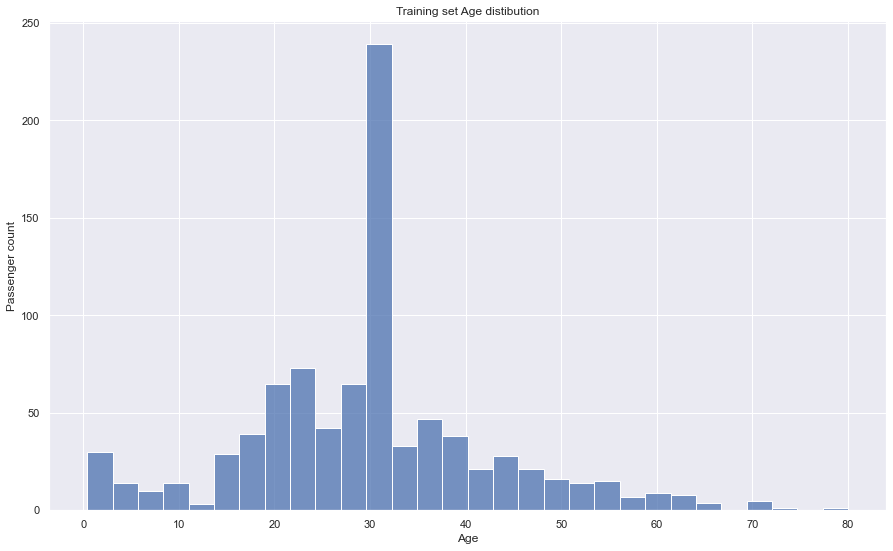

In [22]:
fig, axs = plt.subplots(figsize=(15, 9))
ax = sns.histplot(x="Age", data=train_df)
ax.set(xlabel='Age', ylabel='Passenger count', title="Training set Age distibution")

Most of the passengers were around 30 years

[Text(0.5, 0, 'SibSp'),
 Text(0, 0.5, 'Passenger count'),
 Text(0.5, 1.0, 'Training set SibSp distibution')]

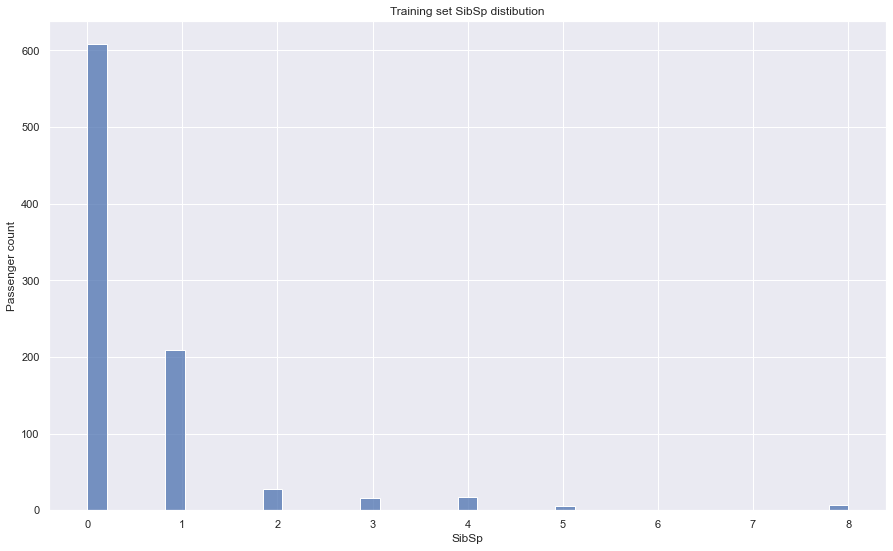

In [23]:
fig, axs = plt.subplots(figsize=(15, 9))
ax = sns.histplot(x="SibSp", data=train_df)
ax.set(xlabel='SibSp', ylabel='Passenger count', title="Training set SibSp distibution")

Most of the passenegers travelled alone

[Text(0.5, 0, 'Parch'),
 Text(0, 0.5, 'Passenger count'),
 Text(0.5, 1.0, 'Training set SibSp distibution')]

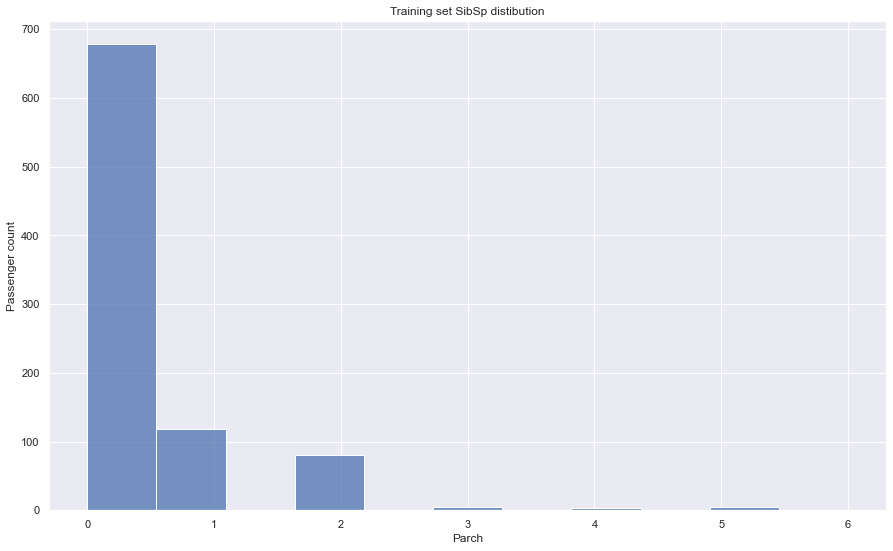

In [24]:
fig, axs = plt.subplots(figsize=(15, 9))
ax = sns.histplot(x="Parch", data=train_df)
ax.set(xlabel='Parch', ylabel='Passenger count', title="Training set SibSp distibution")

Most of the passenegers travelled alone

[Text(0.5, 0, 'Fare'),
 Text(0, 0.5, 'Passenger count'),
 Text(0.5, 1.0, 'Training set Fare distibution')]

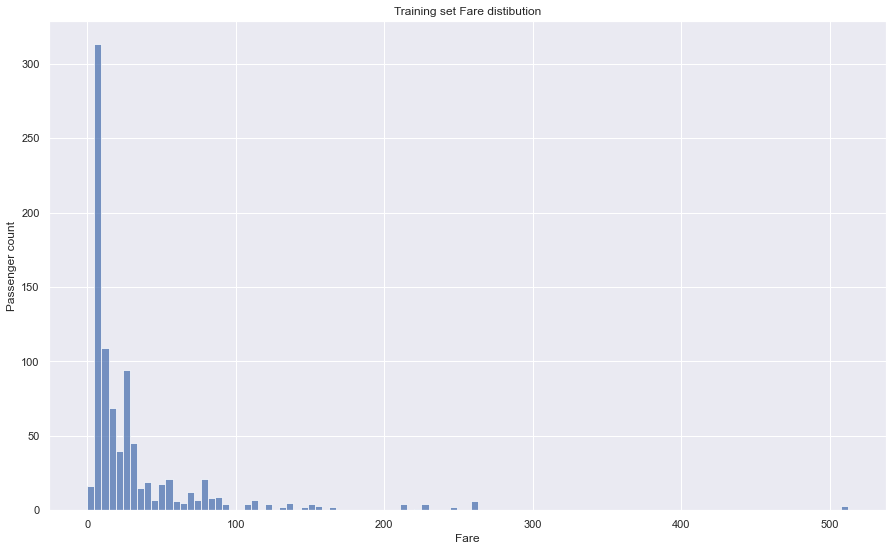

In [25]:
fig, axs = plt.subplots(figsize=(15, 9))
ax = sns.histplot(x="Fare", data=train_df)
ax.set(xlabel='Fare', ylabel='Passenger count', title="Training set Fare distibution")

Almost all passenegrs paid a little for the journey

[Text(0.5, 0, 'Embarked'),
 Text(0, 0.5, 'Passenger count'),
 Text(0.5, 1.0, 'Training set Embarked distibution')]

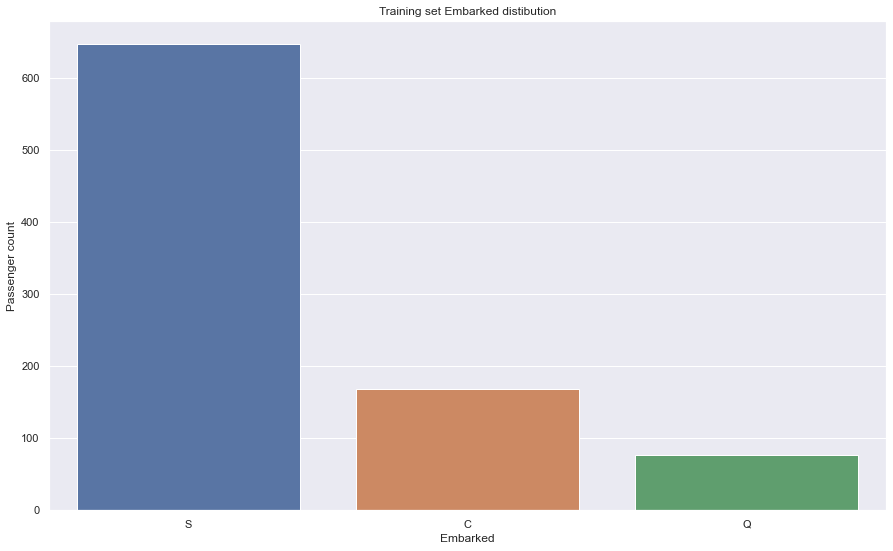

In [26]:
fig, axs = plt.subplots(figsize=(15, 9))
ax = sns.countplot(x="Embarked", data=train_df)
ax.set(xlabel='Embarked', ylabel='Passenger count', title="Training set Embarked distibution")

Most of the passengers embarked in 'S' (Southampton)

### 4.5 Identification of the Significant Correlations

Lets find the survival rate in each cathegory of the passengers

[Text(0, 0, 'First'), Text(1, 0, 'Second'), Text(2, 0, 'Third')]

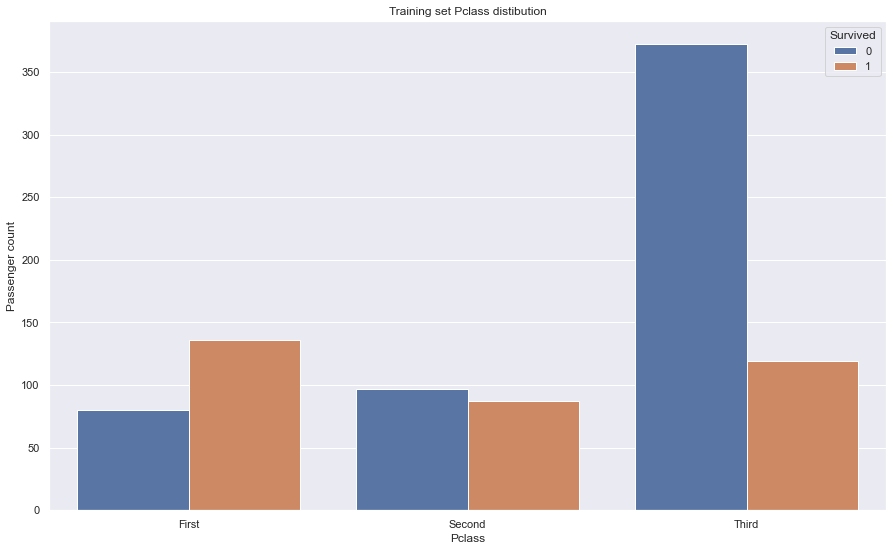

In [27]:
fig, axs = plt.subplots(figsize=(15, 9))
my_xticks = ['First','Second', 'Third']
ax = sns.countplot(x="Pclass", hue='Survived', data=train_df)
ax.set(xlabel='Pclass', ylabel='Passenger count', title="Training set Pclass distibution")
ax.set_xticklabels(my_xticks)

Most of the passengers in Third class didn`t survive, while in Fist class the survival rate is higher

[Text(0.5, 0, 'Sex'),
 Text(0, 0.5, 'Passenger count'),
 Text(0.5, 1.0, 'Training set Sex distibution')]

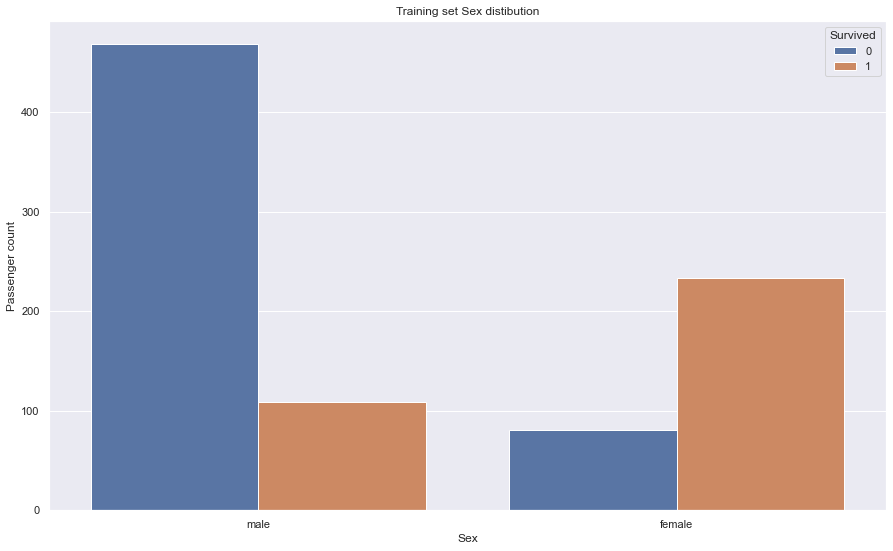

In [28]:
fig, axs = plt.subplots(figsize=(15, 9))
ax = sns.countplot(x="Sex", hue='Survived', data=train_df)
ax.set(xlabel='Sex', ylabel='Passenger count', title="Training set Sex distibution")

Most of the males didn`t survive

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Passenger count'),
 Text(0.5, 1.0, 'Training set Age distibution')]

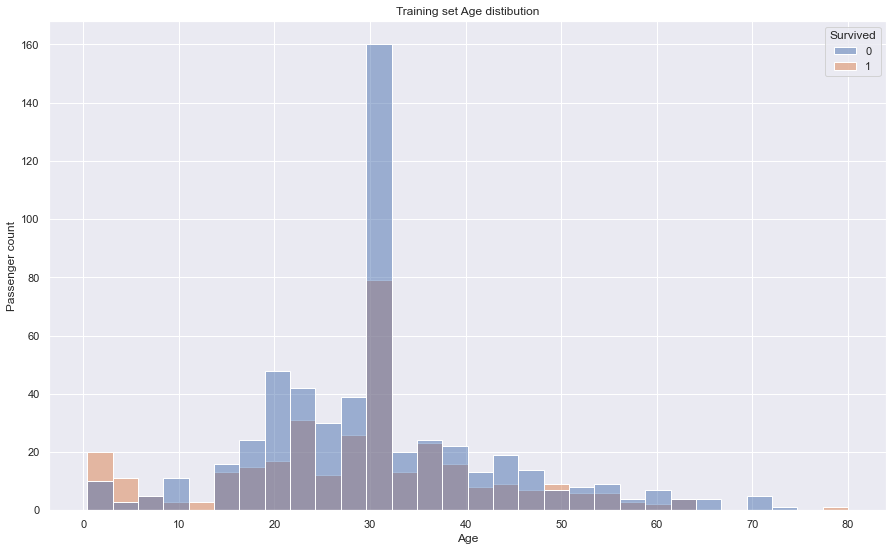

In [29]:
fig, axs = plt.subplots(figsize=(15, 9))
ax = sns.histplot(x="Age", hue='Survived', data=train_df)
ax.set(xlabel='Age', ylabel='Passenger count', title="Training set Age distibution")

Young children has higher survival rate. Half of the passengers that have 30 years didn`t survive

[Text(0.5, 0, 'SibSp'),
 Text(0, 0.5, 'Passenger count'),
 Text(0.5, 1.0, 'Training set SibSp distibution')]

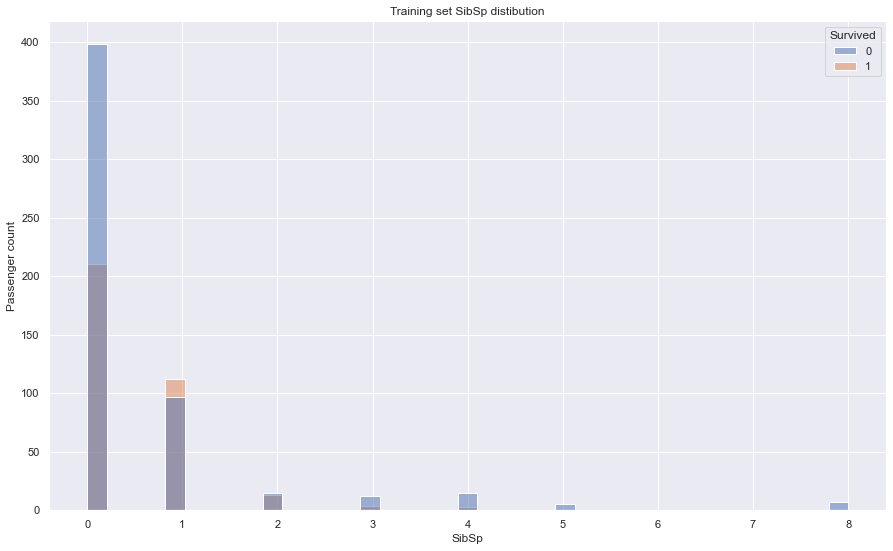

In [30]:
fig, axs = plt.subplots(figsize=(15, 9))
ax = sns.histplot(x="SibSp", hue='Survived', data=train_df)
ax.set(xlabel='SibSp', ylabel='Passenger count', title="Training set SibSp distibution")

[Text(0.5, 0, 'Parch'),
 Text(0, 0.5, 'Passenger count'),
 Text(0.5, 1.0, 'Training set SibSp distibution')]

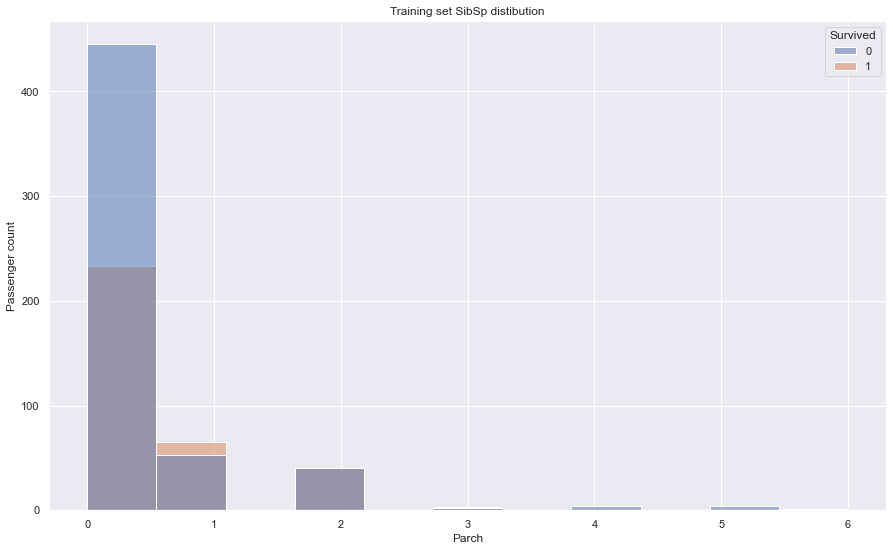

In [31]:
fig, axs = plt.subplots(figsize=(15, 9))
ax = sns.histplot(x="Parch", hue='Survived', data=train_df)
ax.set(xlabel='Parch', ylabel='Passenger count', title="Training set SibSp distibution")

Passengers that are alone has a higher survival rate

[Text(0.5, 0, 'Fare'),
 Text(0, 0.5, 'Passenger count'),
 Text(0.5, 1.0, 'Training set Fare distibution')]

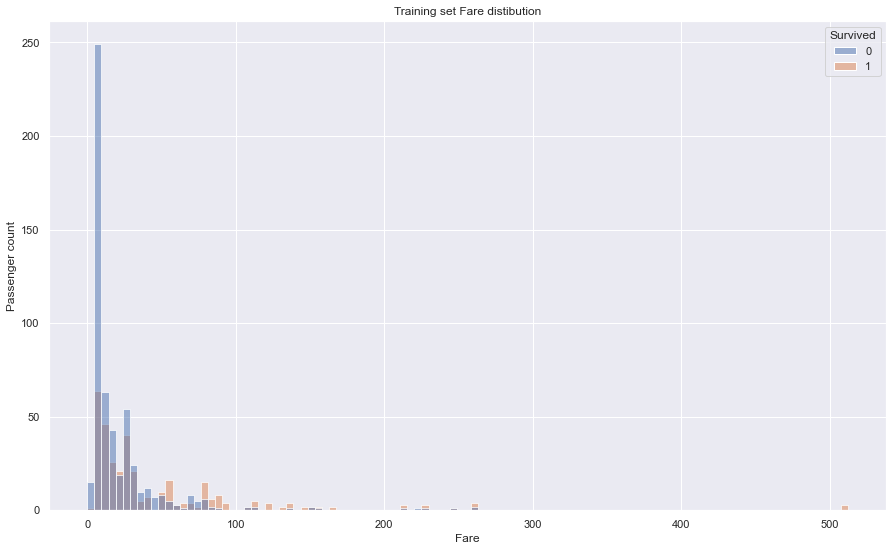

In [32]:
fig, axs = plt.subplots(figsize=(15, 9))
ax = sns.histplot(x="Fare", hue='Survived', data=train_df)
ax.set(xlabel='Fare', ylabel='Passenger count', title="Training set Fare distibution")

Passengers with low fare tickets have lower survival rate

[Text(0.5, 0, 'Embarked'),
 Text(0, 0.5, 'Passenger count'),
 Text(0.5, 1.0, 'Training set Embarked distibution')]

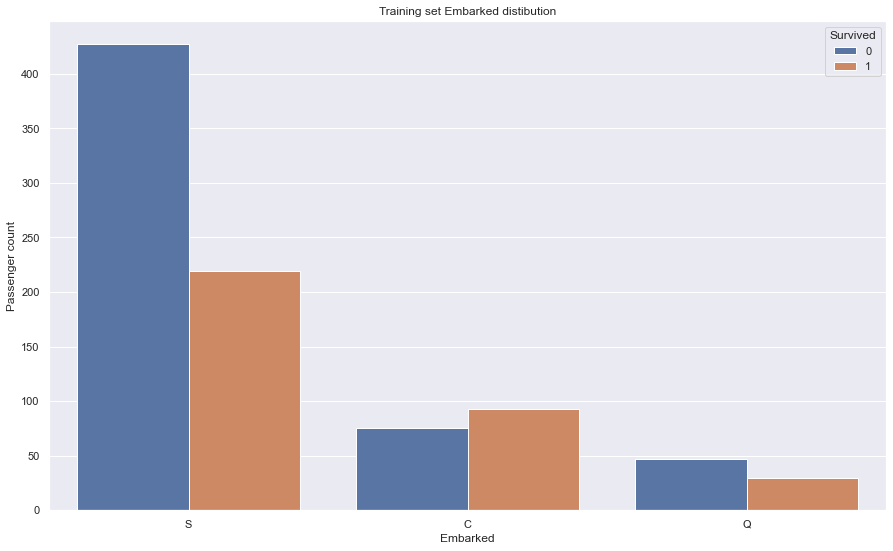

In [33]:
fig, axs = plt.subplots(figsize=(15, 9))
ax = sns.countplot(x="Embarked", hue='Survived', data=train_df)
ax.set(xlabel='Embarked', ylabel='Passenger count', title="Training set Embarked distibution")

Cretaion of correlation matrix

In [34]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [35]:
corr = train_df.corr()

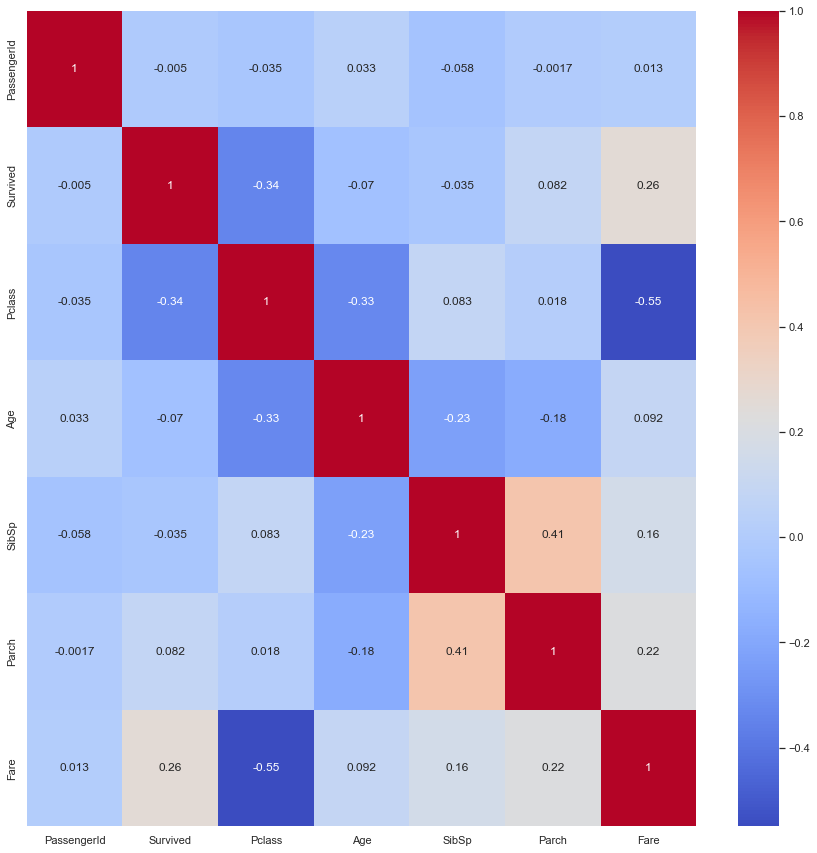

In [36]:
plt.figure(figsize = (15,15))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

## 5. Feature Engineering <a class="anchor" id="Feature_Engineering"></a>

### 5.1 Eliminating Unnecessary Features

We can eliminate unnecessary columns like PassengerId, Ticket, Cabin.

In [37]:
train_df = train_df.drop(columns = ['PassengerId', 'Ticket', 'Cabin', 'Name'])
test_df = test_df.drop(columns = ['Ticket', 'Cabin', 'Name'])

### 5.2 Binning Age

We will bin the age in 5 groups

In [38]:
train_df['Age'] = pd.qcut(train_df['Age'], 5, labels=False)
test_df['Age'] = pd.qcut(test_df['Age'], 5, labels=False)

### 5.2 Binning Fare

We will bin fare in 3 groups

In [39]:
train_df['Fare'] = pd.qcut(train_df['Fare'], 3, labels=False)
test_df['Fare'] = pd.qcut(test_df['Fare'], 3, labels=False)

### 5.3 Frequency Encoding

Lets create a feature Family_Size

In [40]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch'] + 1

train_df = train_df.drop(columns = ['SibSp', 'Parch'])
test_df = test_df.drop(columns = ['SibSp', 'Parch'])

### 5.4 Creating dummy variables 

In [41]:
test = pd.get_dummies(train_df.Sex)
train_df['Female'] = test['female']
train_df['Male'] = test['male']
train_df = train_df.drop(columns='Sex')

test2 = pd.get_dummies(test_df.Sex)
test_df['Female'] = test2['female']
test_df['Male'] = test2['male']
test_df = test_df.drop(columns='Sex')

In [42]:
test = pd.get_dummies(train_df.Embarked)
train_df['S'] = test['S']
train_df['C'] = test['C']
train_df['Q'] = test['Q']
train_df = train_df.drop(columns='Embarked')

test2 = pd.get_dummies(test_df.Embarked)
test_df['S'] = test2['S']
test_df['C'] = test2['C']
test_df['Q'] = test2['Q']
test_df = test_df.drop(columns='Embarked')

## 6. Model Data <a class="anchor" id="Model_Data"></a>

In [43]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

### 6.1 Logistic Regression

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
prediction = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.02

### 6.2 Support Vector Machines

In [49]:
svc = SVC()
svc.fit(X_train, Y_train)
prediction = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

81.93

### 6.3 k-nearest Neighbors

In [50]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
prediction = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.63

### 6.4 Gaussian Naive Bayes

In [51]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
prediction = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.34

### 6.5 Perceptron

In [54]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
prediction = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

80.36

### 6.6 Linear SVC

In [55]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
prediction = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\a.artamonov\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.69

### 6.7 Stochastic Gradient Descent

In [56]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
prediction = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

64.2

### 6.7 Decision Tree

In [57]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
prediction = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

87.88

### 6.8 Random Forest

In [75]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
prediction = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.88

### 6.8 XGBoost

In [78]:
XGBoost = GradientBoostingClassifier(n_estimators=100)
XGBoost.fit(X_train, Y_train)
prediction = XGBoost.predict(X_test)
XGBoost.score(X_train, Y_train)
acc_XGBoost = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_XGBoost

87.88

### 6.9 Summary

In [81]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'XGBoost'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree, acc_XGBoost]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.88
8,Decision Tree,87.88
9,XGBoost,87.88
1,KNN,85.63
0,Support Vector Machines,81.93
5,Perceptron,80.36
2,Logistic Regression,80.02
7,Linear SVC,79.69
4,Naive Bayes,78.34
6,Stochastic Gradient Decent,64.20


The highest scores are in XGBoost/Decision Tree/Random Forest

In [95]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": prediction
    })

In [96]:
submission.to_csv('gender.csv', index=False)